Current position:/home/gavin/Machine/caffe
(360, 480, 3)


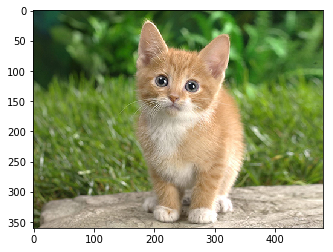

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import caffe

caffe_root = '/home/gavin/Machine/caffe'
import os,sys

#切换到指定的目录
os.chdir(caffe_root)

#获取当前的目录
position = os.getcwd()
print("Current position:%s" % position)
sys.path.insert(0, caffe_root+'python')
im = caffe.io.load_image("examples/images/cat.jpg")
print(im.shape)
plt.imshow(im)
#关闭坐标
#plt.axis('off')


In [ ]:
import caffe
net = caffe.Net('/home/gavin/Machine/caffe/examples/net_surgery/conv.prototxt', caffe.TEST)
im_input=im[np.newaxis,:,:,:].transpose(0,3,1,2)
print ("data-blobs:",im_input.shape)
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input
plt.imshow(net.blobs['data'].data[0].transpose(1,2,0))
plt.axis('off')

In [5]:
plt.rcParams['image.cmap'] = 'gray'

def show_data(data,head,padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    plt.figure()
    plt.title(head)
    plt.imshow(data)
    plt.axis('off')

In [6]:
print("data-blobs:",net.blobs['data'].data.shape)
show_data(net.blobs['data'].data[0],'origin images')


NameError: name 'net' is not defined